## Declaração de bibliotecas e demais configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv

from sklearn import svm

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções relacionadas ao método ou auxiliares

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados
* Fazemos aqui a leitura dos dados simulados no 'juputer-notebook':"Pratica-SepLin-SimulacaoDados"
* $\texttt{path_D}$ corresponde aos dados de treinamento
* $\texttt{path_I}$ corresponde aos dados usados para avaliação do método

In [3]:
#Dados de treinamento
path_D = 'saidaSim_D_SepLin.txt'

#Dados de avaliação
path_I = 'saidaSim_I_SepLin.txt'

#Leitura dos dados
yD,xD = read_class_data(path_D)
yI,xI = read_class_data(path_I)

## Classificação dos dados
* $\texttt{g}$ é uma instanciação gerada via svm.SVC
* $C=100$ e $\texttt{kernel='linear'}$ são parâmetros do método
* $\texttt{decision\_function\_shape='ovr'}$ determina o uso da estratégia 'ovr'
* O Treinamento é efetuado pelo método 'fit'
* A classificação (predição) é realizada pelo método 'predict'

In [4]:
g = svm.SVC(C=100,kernel='linear',decision_function_shape='ovr')
g.fit(xD,yD)

yEst = g.predict(xI)

## Avaliação da acurácia
* O processo de avaliação é bem simples
* É apenas feita uma contagem do número de concordâncias entre $\texttt{yI}$ e $\texttt{yEst}$
* O valor obtido é dividido por $N$, a fim de expressar a precisão em termos de porcentagem

In [5]:
acerto = np.count_nonzero( yI == yEst ) / yI.size
print("Acerto: %f "%(acerto))

Acerto: 0.902000 


## Visualização dos resultados
* Diferente da aula anterior, vamos fazer uma visualização diferente dos resultados
* Acertos de classificação serão denotados em azul
* Erros de classificação serão denotados em vermelho

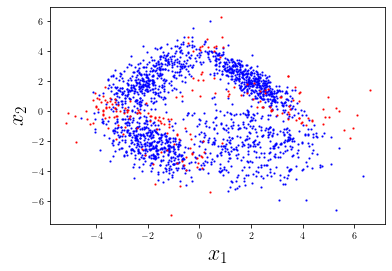

In [6]:
posAcerto = np.where( (yI-yEst) == 0)
posErro   = np.where( (yI-yEst) != 0)

plt.plot(xI[posAcerto,0],xI[posAcerto,1],'s',color='blue', markersize=1)
plt.plot(xI[posErro,0],xI[posErro,1],'s',color='red', markersize=1)

plt.xlabel('$x_1$', fontsize=22)
plt.ylabel('$x_2$', fontsize=22)

plt.show()